In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("dataset.csv")

<IPython.core.display.Javascript object>

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
data.isnull().count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
corr_matrix=data.corr()

In [10]:
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<IPython.core.display.Javascript object>

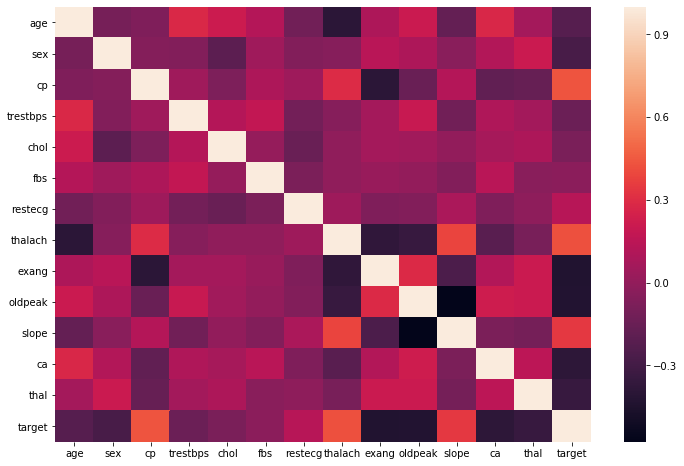

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

In [12]:
X=data.drop(["fbs","chol","target"],axis=1)

In [13]:
X.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,0,150,0,2.3,0,0,1
1,37,1,2,130,1,187,0,3.5,0,0,2
2,41,0,1,130,0,172,0,1.4,2,0,2
3,56,1,1,120,1,178,0,0.8,2,0,2
4,57,0,0,120,1,163,1,0.6,2,0,2


In [14]:
Y=data["target"]

In [15]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
scaler=sc.fit(X)

In [19]:
scaled_data=scaler.transform(X)

In [20]:
df=pd.DataFrame(scaled_data,columns=X.columns)

<IPython.core.display.Javascript object>

In [21]:
df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


## Using LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(df,Y,test_size=0.2,random_state=42)

In [24]:
X_train.shape,X_test.shape

((242, 11), (61, 11))

In [25]:
df.shape

(303, 11)

In [26]:
y_train.shape,y_test.shape

((242,), (61,))

In [27]:
LR_model=LogisticRegression()
LR_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
LR_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
predict=LR_model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
print(confusion_matrix(y_test,predict))

[[25  4]
 [ 3 29]]


In [32]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Using RandomForest without fine Tuning its params

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_model=RandomForestClassifier()

In [35]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
predict1=rf_model.predict(X_test)

In [38]:
print(confusion_matrix(y_test,predict1))

[[24  5]
 [ 4 28]]


In [39]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Using Xgboost without fine tuning its params

In [40]:
import xgboost

In [41]:
classifier=xgboost.XGBClassifier()

In [42]:
classifier

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [43]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [44]:
predict2=classifier.predict(X_test)

In [45]:
print(confusion_matrix(predict2,y_test))

[[24  6]
 [ 5 26]]


In [46]:
print(classification_report(predict2,y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.81      0.84      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### Selecting the best model for XGBoost using RandomisedSearchCV

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [49]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
## n_jobs=-1 means using all processors.RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [50]:
random_search.fit(df,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [

In [51]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [52]:
random_search.best_score_

0.9150472983806319

In [53]:
classifier1=xgboost.XGBClassifier(min_child_weight=3,
 max_depth= 15,
 learning_rate= 0.05,
 gamma= 0.0,
 colsample_bytree= 0.3)

In [54]:
classifier1

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.3, gamma=0.0,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [55]:
classifier1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [56]:
predict3=classifier1.predict(X_test)

In [57]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [58]:
from sklearn.metrics import recall_score

In [59]:
print(recall_score(y_test,predict3))  #Xgboost with fine tuning params

0.875


In [60]:
print(recall_score(y_test,predict)) # Normal LogisticRegression

0.90625


In [61]:
print(recall_score(y_test,predict1)) #RandomForest without fine tuned params

0.875


In [62]:
print(recall_score(y_test,predict2)) #Xgboost without fine tunned params

0.8125


## RamdomForest with fine tuning params

In [63]:
RF_params={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [64]:
random_search_rf=RandomizedSearchCV(rf_model,param_distributions=RF_params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [65]:
random_search_rf.fit(df,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [66]:
random_search_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [67]:
random_search.best_score_

0.9150472983806319

In [68]:
rf_model_tuned=RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 5,
 min_samples_leaf= 2,
 max_features='auto',
 max_depth=30,
 bootstrap= True)

In [69]:
rf_model_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
predict4=rf_model_tuned.predict(X_test)

In [71]:
print(recall_score(predict4,y_test)) #RandomForest with fine tuned params

0.8484848484848485


In [72]:
param_grid_LR = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'class_weight':['balanced', None],'max_iter':[100,200,300,400,1000,1500] }

In [73]:
random_search_LR=RandomizedSearchCV(LR_model,param_distributions=param_grid_LR
                                    ,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [74]:
random_search_LR.fit(df,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'class_weight': ['balanced', None],
                                        'max_iter': [100, 200, 300, 400, 1000,

In [75]:
LR_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
random_search_LR.best_params_

{'max_iter': 300, 'class_weight': 'balanced', 'C': 10}

In [77]:
random_search_LR.best_score_

0.9051146384479718

In [78]:
LR_model_tuned=LogisticRegression(max_iter= 1500, class_weight= 'balanced', C= 100)

In [79]:
LR_model_tuned.fit(X_train,y_train)

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
predict5=LR_model_tuned.predict(X_test)

In [81]:
print(recall_score(predict5,y_test))  #Logistic regression model with tuned params

0.8666666666666667


### I have used 3 different models here to predict the target data. LogisticRegression, RandomForest and Xgboost. All of these models were used normally first and then their params were fined tuned. The results are as follows:

# 1. LogisticRegression

In [85]:
print("The Recall score of LR model without fine tuning is {}".format(recall_score(predict,y_test)))

The Recall score of LR model without fine tuning is 0.8787878787878788


In [86]:
print("The Recall score of LR model with fine tuning is {}".format(recall_score(predict5,y_test)))

The Recall score of LR model with fine tuning is 0.8666666666666667


# 2.RandomForest

In [88]:
print("The Recall score of RF model without fine tuning is {}".format(recall_score(predict1,y_test)))

The Recall score of RF model without fine tuning is 0.8484848484848485


In [90]:
print("The Recall score of RF model with fine tuning is {}".format(recall_score(predict4,y_test)))

The Recall score of RF model with fine tuning is 0.8484848484848485


# 3.Xgboost

In [91]:
print("The Recall score of XG model without fine tuning is {}".format(recall_score(predict2,y_test)))

The Recall score of XG model without fine tuning is 0.8387096774193549


In [92]:
print("The Recall score of XG model with fine tuning is {}".format(recall_score(predict3,y_test)))

The Recall score of XG model with fine tuning is 0.9333333333333333


## Hence we can conclude that Xgboost model with fined tuned parameters is the best with highest recall score of 93%